Solving Puzzle Using BFS and DFS


Algorithm
1. Find Blank Square  
2. Indentify PossibleAction  
3. Make Action Move Square -> New State  
4. Check if Goal State  
5. if not Goal State Go to 1

In [9]:
from collections import deque
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def find_blank_square(state):
    return state.index(0)

def actions(state, dimension):
    possible_actions = ['UP', 'DOWN', 'RIGHT', 'LEFT']
    index_blank_square = find_blank_square(state)

    row, col = divmod(index_blank_square, dimension)

    # Implmente code to possible_actions
    if row == 0:
        possible_actions.remove('UP')
    if row == dimension-1:
        possible_actions.remove('DOWN')
    if col == 0:
        possible_actions.remove('LEFT')
    if col == dimension-1:
        possible_actions.remove('RIGHT')
    return possible_actions

def result(state, action, dimension):
    blank = find_blank_square(state)
    new_state = list(state)
    move = {'UP': -dimension, 'DOWN': dimension, 'LEFT': -1, 'RIGHT': 1}
    neighbor = blank + move[action]
    new_state[blank], new_state[neighbor] = new_state[neighbor], new_state[blank]
    return tuple(new_state)

def goal_test(state, goal):
    return state == goal

def view_state(state, dimension):
    state = np.reshape(state, (dimension, dimension))
    ax = sns.heatmap(state, annot=True, fmt="d", cbar=None, xticklabels=False, yticklabels=False)
    plt.show()

def breadth_first_search(initial, goal, dimension, debug=True):
    visited = set() 
    frontier = deque([initial]) 
    while frontier:
        node = frontier.popleft() 
        if node not in visited:
            visited.add(node) 
            if debug:
                view_state(node, dimension)

            if goal_test(node, goal):
                return node
            for action in actions(node, dimension):
                next_node = result(node, action, dimension)
                if(next_node not in visited) and (next_node not in frontier):
                    frontier.append(next_node)

def depth_first_search(initial, goal, dimension, debug=True):
    visited = set() 
    frontier = deque([initial])
    while frontier:
        node = frontier.pop() 
        if node not in visited:
            visited.add(node) 
            if debug:
                view_state(node, dimension)

            if goal_test(node, goal):
                return node
            for action in actions(node, dimension):
                next_node = result(node, action, dimension)
                if(next_node not in visited) and (next_node not in frontier):
                    frontier.append(next_node)


Example

In [10]:
# Example usage
initial_state = (1, 0, 2, 3, 4, 5, 6, 7, 8)
goal_state = (0, 1, 2, 3, 4, 5, 6, 7, 8)
dimension = int(len(initial_state) ** 0.5)

BFS

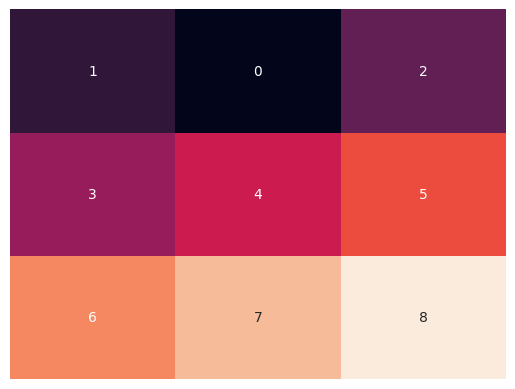

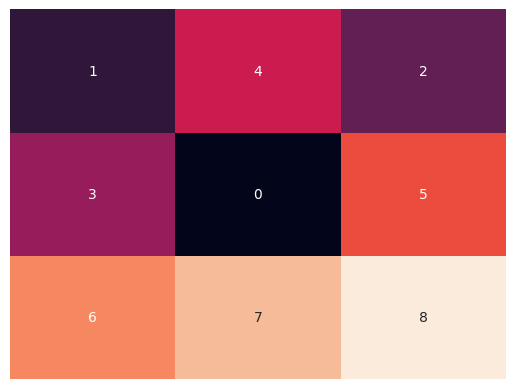

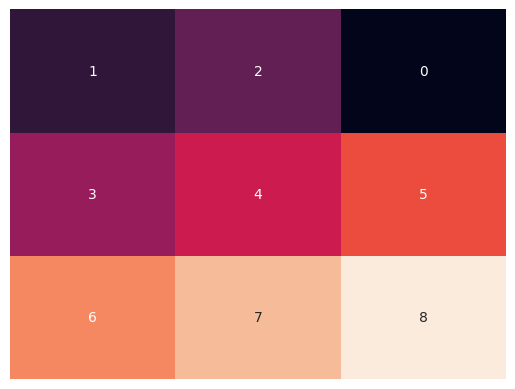

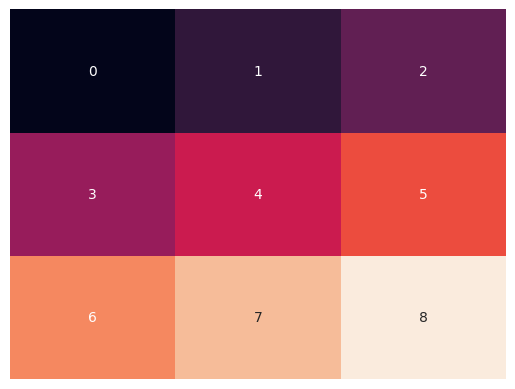

(0, 1, 2, 3, 4, 5, 6, 7, 8)

In [11]:

breadth_first_search(initial_state, goal_state, dimension)

DFS

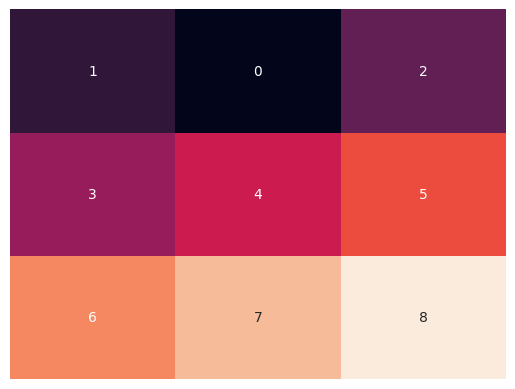

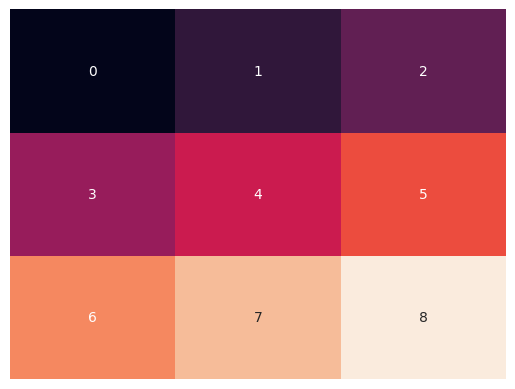

(0, 1, 2, 3, 4, 5, 6, 7, 8)

In [12]:
depth_first_search(initial_state, goal_state, dimension)